In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

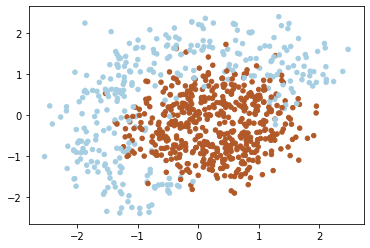

In [3]:
with open('train.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('target.npy', 'rb') as fin:
    y = np.load(fin)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()

In [12]:
def expand(x):
    """
    This expansion allows your linear model to make non-linear seperation
    """
    x_expanded = np.zeros(shape = (x.shape[0], 6))
    x_expanded = np.append(x, x ** 2, axis = 1)
    x_expanded = np.append(x_expanded, (x[:,0] * x[:,1]).reshape(x.shape[0], 1), axis = 1)
    x_expanded = np.append(x_expanded, np.ones(x.shape[0]).reshape(x.shape[0], 1), axis = 1)
    return x_expanded

In [14]:
# test
dummy_X = np.array([
        [0,0],
        [1,0],
        [2, 3],
        [1, 4]
    ])

expand(dummy_X)

array([[ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  9.,  6.,  1.],
       [ 1.,  4.,  1., 16.,  4.,  1.]])

In [15]:
X_expanded = expand(X)
X_expanded

array([[ 1.20798057,  0.0844994 ,  1.45921706,  0.00714015,  0.10207364,
         1.        ],
       [ 0.76121787,  0.72510869,  0.57945265,  0.52578261,  0.5519657 ,
         1.        ],
       [ 0.55256189,  0.51937292,  0.30532464,  0.26974823,  0.28698568,
         1.        ],
       ...,
       [-1.22224754,  0.45743421,  1.49388906,  0.20924606, -0.55909785,
         1.        ],
       [ 0.43973452, -1.47275142,  0.19336645,  2.16899674, -0.64761963,
         1.        ],
       [ 1.4928118 ,  1.15683375,  2.22848708,  1.33826433,  1.72693508,
         1.        ]])

# Logistic regression

In [16]:
def probability(x, w):
    z = np.dot(x, w.T)
    return 1/(1+np.exp(-z))

In [17]:
def compute_loss(x, y, w):
    m = x.shape[0]
    p = probability(x, w)
    return -(1.0/m) * np.sum(y * np.log(p) + (1-y) * np.log(1-p))

In [18]:
def compute_grad(x, y, w):
    p = probability(x, w)
    m = x.shape[0]
    return (1.0/m) * np.dot(x.T, (p-y))

In [19]:
from IPython import display

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """draws classifier prediction with matplotlib magic"""
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

## Mini-Batch SGD

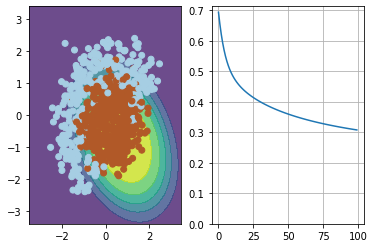

<Figure size 432x288 with 0 Axes>

In [22]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])
eta = 0.1
n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)
    w = w - eta * compute_grad(X_expanded, y, w)
    
visualize(X, y, w, loss)
plt.clf()

## SGD with momentum

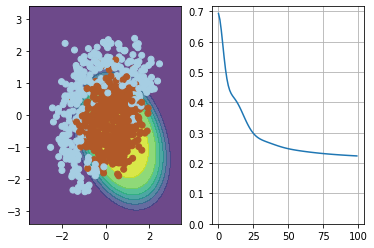

<Figure size 432x288 with 0 Axes>

In [24]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])
eta = 0.05      # learning rate
alpha = 0.9     # momentum
nu = np.zeros_like(w)
n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))
for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)
    nu = alpha * nu + eta * compute_grad(X_expanded, y, w)
    w = w - nu
    
visualize(X, y, w, loss)
plt.clf()

## RMS prop

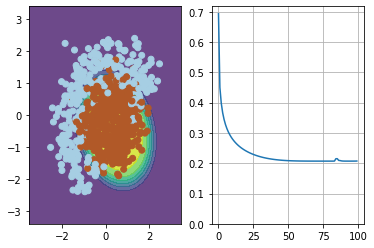

<Figure size 432x288 with 0 Axes>

In [25]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1.])
eta = 0.1 # learning rate
alpha = 0.9 # moving average of gradient norm squared
g2 = 0
eps = 1e-8
n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)
    g2 = alpha * g2 + (1 - alpha) * np.square(compute_grad(X_expanded, y, w))
    w = w - eta * compute_grad(X_expanded, y, w) / np.sqrt(g2 + eps)
    
visualize(X, y, w, loss)
plt.clf()